In [1]:
import sys
from pathlib import Path

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_dir = Path.cwd().parent.joinpath('data')

In [4]:
mps = {} # mass pairs
mps[1400] = [400, 600, 800, 1000, 1200, 1300]

In [5]:
wr = 1400
n = [400, 600, 800, 1000, 1200, 1300]
eejj_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
weight_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))

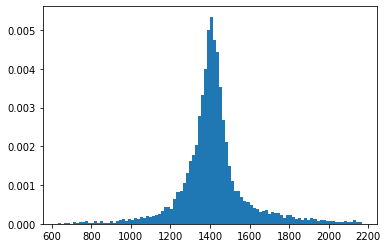

In [6]:
plt.hist(eejj_ref, range=[wr*0.45,wr*1.55], bins=100, density=True)
plt.show()

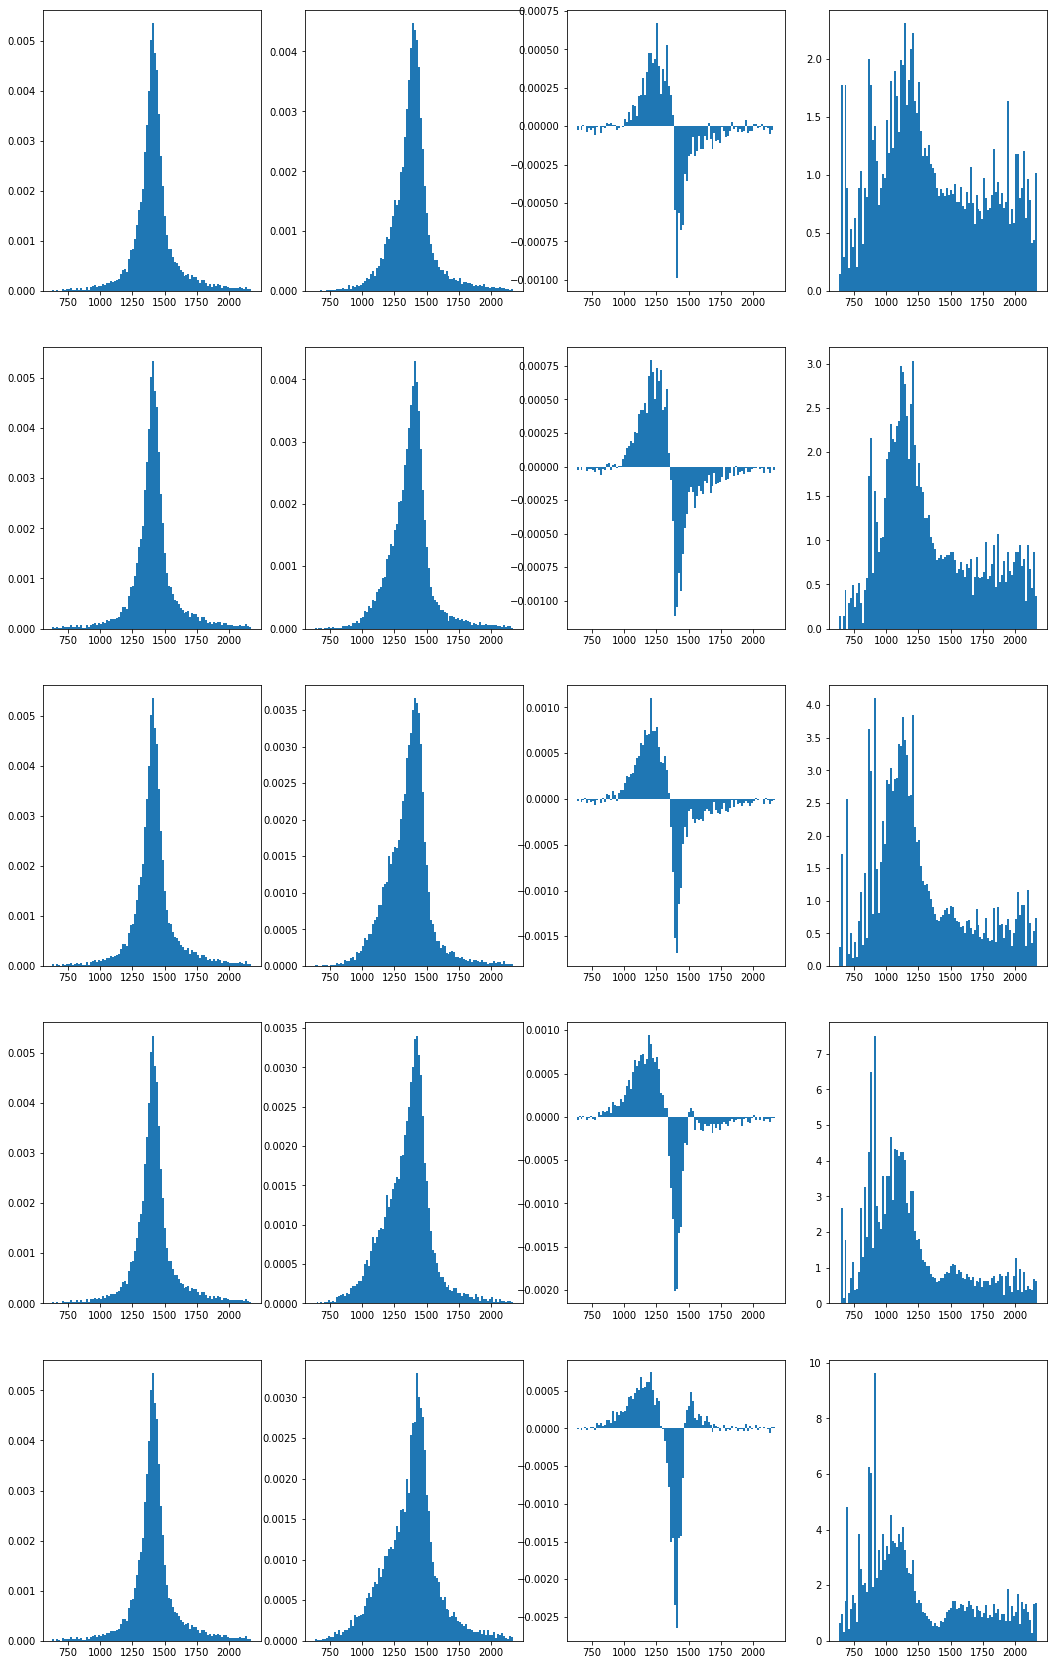

In [15]:
for wr, ns in mps.items():
    test_num = len(ns)-1
    fig, axs = plt.subplots(test_num, 4, figsize=(18, 6*test_num))
    eejj_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
    weight_ref = np.load(data_dir.joinpath(f"WR{wr}N{n[0]}_eejjMassArray.npy"))
    for i in range(1,len(ns)):
        eejj_test = np.load(data_dir.joinpath(f"WR{wr}N{n[i]}_eejjMassArray.npy"))
        weight_test = np.load(data_dir.joinpath(f"WR{wr}N{n[i]}_eejjMassArray.npy"))
        hist_ref = axs[i-1][0].hist(eejj_ref,range=[wr*0.45,wr*1.55], bins=100, density=True)
        hist_test = axs[i-1][1].hist(eejj_test,range=[wr*0.45,wr*1.55], bins=100, density=True)
        
        bar_width = hist_ref[1][1]-hist_ref[1][0]
        axs[i-1][2].bar(x=hist_ref[1][:-1], height=(hist_test[0]-hist_ref[0]), width=bar_width, align='edge')
        axs[i-1][3].bar(x=hist_ref[1][:-1], height=(hist_test[0]/hist_ref[0]), width=bar_width, align='edge')
        
plt.show()

In [8]:
print(hist_test[1][:-1])

[ 630.   645.4  660.8  676.2  691.6  707.   722.4  737.8  753.2  768.6
  784.   799.4  814.8  830.2  845.6  861.   876.4  891.8  907.2  922.6
  938.   953.4  968.8  984.2  999.6 1015.  1030.4 1045.8 1061.2 1076.6
 1092.  1107.4 1122.8 1138.2 1153.6 1169.  1184.4 1199.8 1215.2 1230.6
 1246.  1261.4 1276.8 1292.2 1307.6 1323.  1338.4 1353.8 1369.2 1384.6
 1400.  1415.4 1430.8 1446.2 1461.6 1477.  1492.4 1507.8 1523.2 1538.6
 1554.  1569.4 1584.8 1600.2 1615.6 1631.  1646.4 1661.8 1677.2 1692.6
 1708.  1723.4 1738.8 1754.2 1769.6 1785.  1800.4 1815.8 1831.2 1846.6
 1862.  1877.4 1892.8 1908.2 1923.6 1939.  1954.4 1969.8 1985.2 2000.6
 2016.  2031.4 2046.8 2062.2 2077.6 2093.  2108.4 2123.8 2139.2 2154.6]


In [9]:
np.fft.fft(eejj_ref)

array([ 1.77474902e+07    +0.j        , -3.51381149e+03+24842.0850345j ,
        2.10196065e+04+14848.74462158j, ...,
        1.88460215e+03 -8046.7175992j ,  2.10196065e+04-14848.74462158j,
       -3.51381149e+03-24842.0850345j ])

In [10]:
from scipy.signal import deconvolve

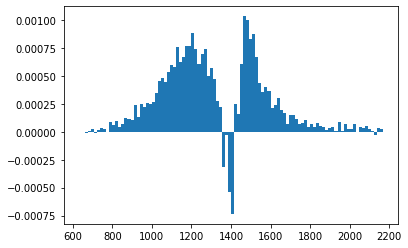

In [13]:
Filter, filter_remainder = deconvolve(signal=hist_test[0], divisor=hist_ref[0])
bar_width = hist_ref[1][1]-hist_ref[1][0]
plt.bar(x=hist_ref[1][:-1], height=filter_remainder, width=bar_width, align='edge')
plt.show()

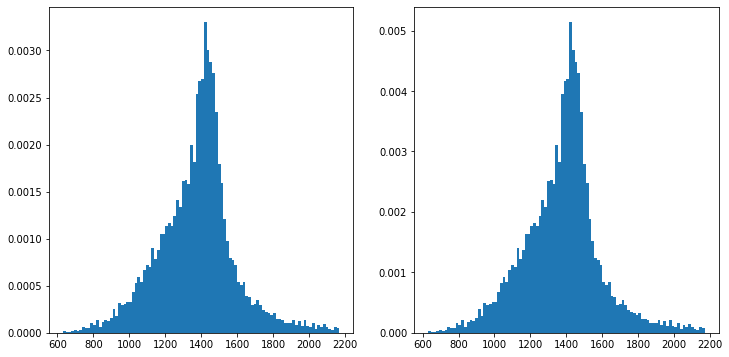

In [14]:
recover, remainder = deconvolve(signal=hist_test[0], divisor=Filter)
bar_width = hist_ref[1][1]-hist_ref[1][0]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
ax1.hist(eejj_test,range=[wr*0.45,wr*1.55], bins=100, density=True)
ax2.bar(x=hist_ref[1][:-1], height=recover, width=bar_width, align='edge')
plt.show()